##Import data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./iris.csv')

In [ ]:
df

,rows,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


##Ploting data

In [ ]:
df_new = df.drop('rows',axis = 1)
df_new

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


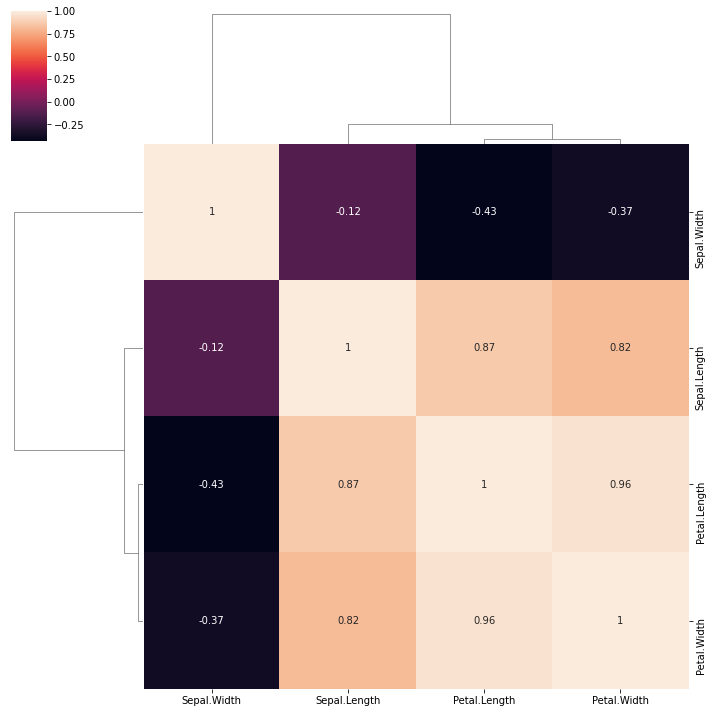

In [ ]:
sns.clustermap(data=df_new.corr(), annot=True)

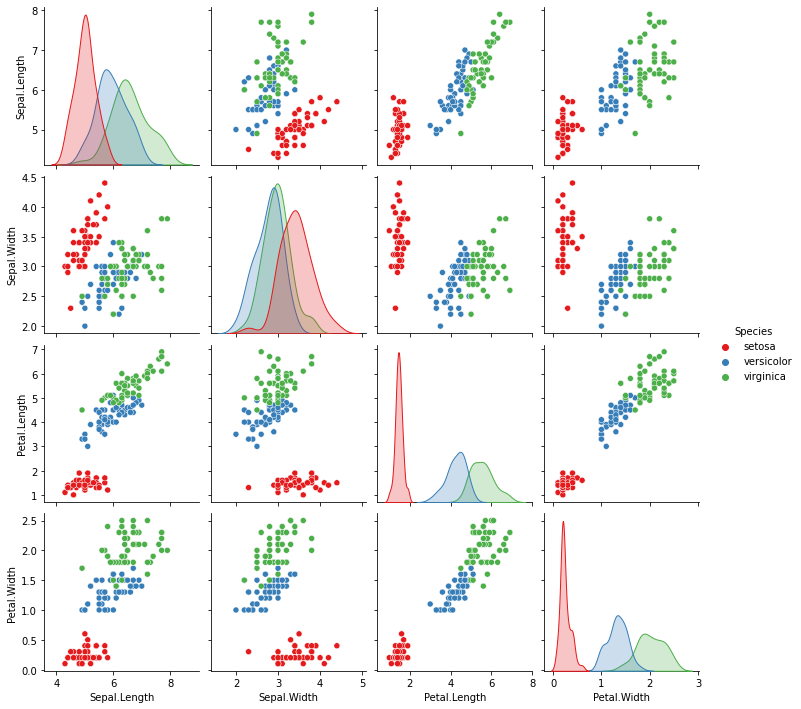

In [ ]:
sns.pairplot(df_new,hue='Species',palette='Set1')

##Prepare data

In [ ]:
df = df.drop('rows',axis=1)

###Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Species',axis=1)
y = df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

##Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

###Trainning model

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

###Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix
preds = dt.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


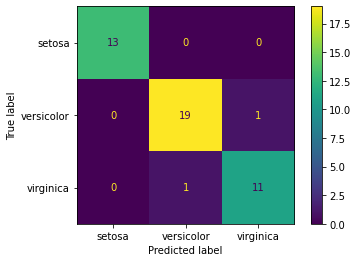

In [ ]:
plot_confusion_matrix(dt, X_test, y_test)

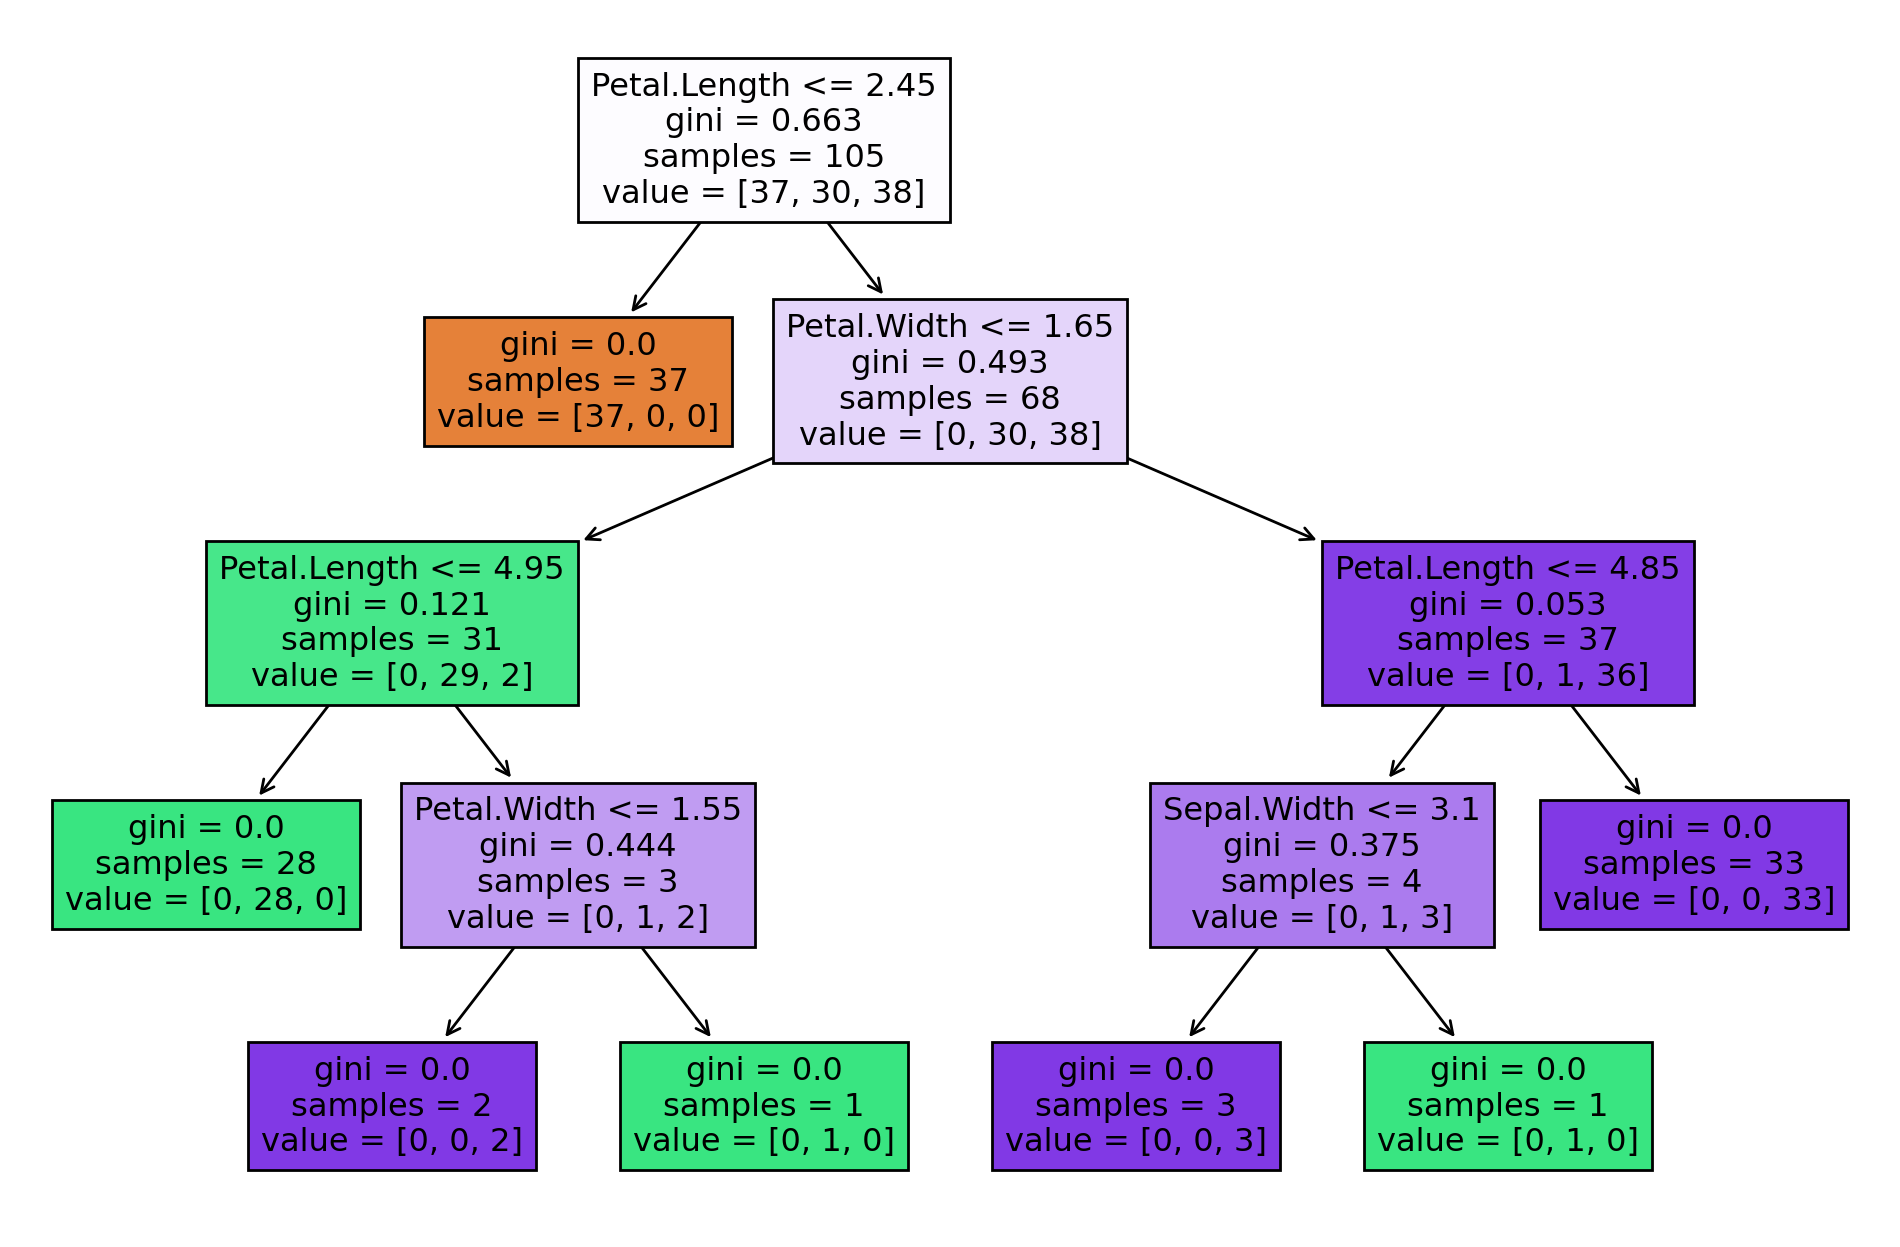

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(dt, feature_names=X.columns, filled=True);

##Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

###Trainning model

7


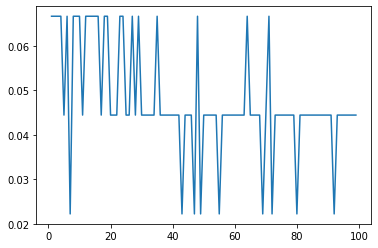

In [ ]:
from sklearn.metrics import accuracy_score
test_error = []
mini = 1000
mini_num = 1000
for n in range(1,100):
    rf = RandomForestClassifier(n_estimators=n,max_features='auto')
    rf.fit(X_train,y_train)
    test_preds = rf.predict(X_test)
    error = 1-accuracy_score(test_preds,y_test)
    test_error.append(error)
    if mini > error:
        mini = error
        mini_num = n
plt.plot(range(1,100),test_error)
print(mini_num)

####So we decided to choose 8 trees for our random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=8,max_features='auto')
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=8)

###Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

preds = rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      0.95      0.93        20
   virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


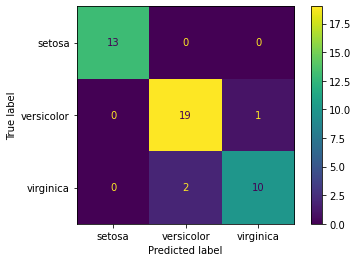

In [ ]:
plot_confusion_matrix(rf,X_test,y_test)

##KNeighbors classifier

###Trainning data

7


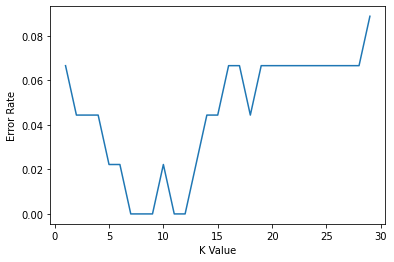

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

mini = 1000
mini_num = 1000
test_error_rates = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    if mini > test_error:
      mini = test_error
      mini_num = k


plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.ylabel('Error Rate')
plt.xlabel("K Value")
print(mini_num)

####So we decided to choose 7 for our K

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scaled_X_train,y_train) 

KNeighborsClassifier(n_neighbors=7)

###Model Evaluation

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, plot_confusion_matrix

pred = knn.predict(scaled_X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      0.95      0.93        20
   virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


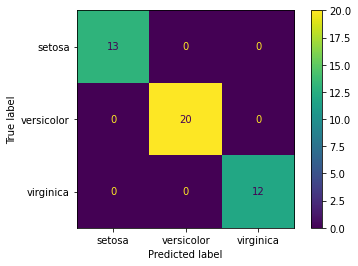

In [ ]:
plot_confusion_matrix(knn,scaled_X_test,y_test)